In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('PerformanceGraphExport.csv', sep='\s*,\s*',
                           header=0, encoding='ascii', engine='python')

In [13]:
data.head()

,Date,S&P 500 (TR),S&P 500 (Net TR),S&P 500
0,4/10/2013,2804.81,2589.71,1587.73
1,4/11/2013,2815.02,2599.07,1593.37
2,4/12/2013,2807.10,2591.74,1588.85
3,4/15/2013,2742.63,2532.21,1552.36
4,4/16/2013,2781.86,2568.43,1574.57


In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data = data[(data['Date'] >= '2015-01-02') & (data['Date'] <= '2015-12-31')]

In [16]:
short_window = 40
long_window = 100

In [17]:
data['signals'] = 0.0

In [19]:
data['short_mavg'] = data['S&P 500'].rolling(window=short_window, min_periods=1, center=False).mean()

In [21]:
data['long_mavg'] = data['S&P 500'].rolling(window=long_window, min_periods=1, center=False).mean()

In [25]:
data['signals'][short_window:] = np.where(data['short_mavg'][short_window:] > data['long_mavg'][short_window:], 1.0, 0.0)

C:\Users\sharfaraz\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
data['positions'] = data['signals'].diff()

In [43]:
fig = plt.figure(figsize=(8,8))

In [44]:
ax1 = fig.add_subplot(111, ylabel='Price in $')

In [45]:
data['S&P 500'].plot(ax=ax1, color='r', lw=2.)

In [46]:
data[['short_mavg', 'long_mavg']].plot(ax=ax1, lw = 2.)

In [47]:
ax1.plot(data.loc[data.positions == 1.0].index, data.short_mavg[data.positions == 1.0], '^', markersize=10, color='m')

In [48]:
ax1.plot(data.loc[data.positions == -1.0].index, data.short_mavg[data.positions == -1.0], 'v', markersize=10, color='k')

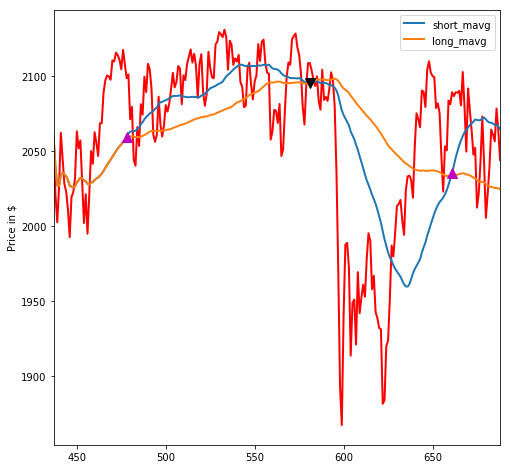

In [49]:
plt.show()
